# Figure containing all fitted densities for the first stock's returns


Number of values outside the range [-15,15] : 14


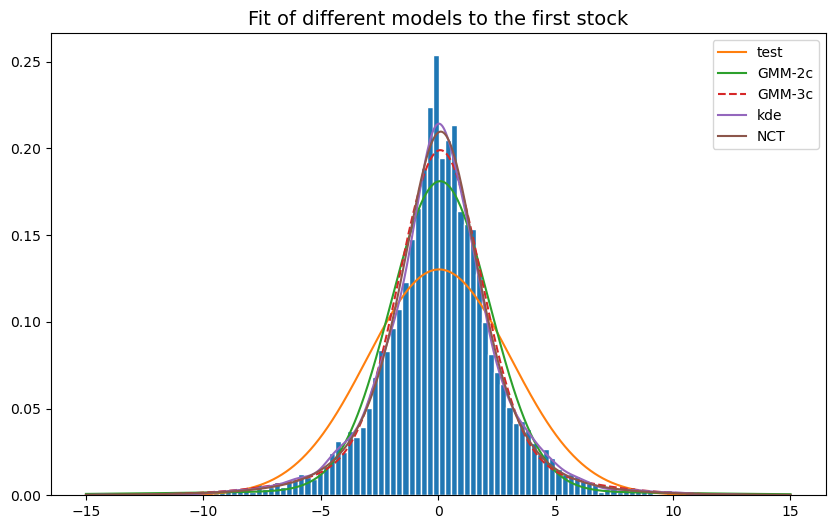

In [45]:
# Loading the data
import numpy as np
import pandas as pd
from scipy.stats import norm, Mixture, Normal, gaussian_kde, nct
import matplotlib.pyplot as plt

# array of percentage log returns
stock = np.load('data/plr_stocks.npy')[0]

# count how many values outside of range [-15,15]
mask_count = (stock >= 15) | (stock <=-15)
print('Number of values outside the range [-15,15] :', np.sum(mask_count))
mask = (stock >= -15) & (stock <= 15)
stock = stock[mask]

gaussian_fit_stock = pd.read_csv('results/gaussian.csv')
mu1 = gaussian_fit_stock.iloc[0]['mu']
sigma1 = gaussian_fit_stock.iloc[0]['sigma']

x = np.linspace(-15, 15, 2000)
plt.figure(figsize=(10, 6))
plt.hist(stock, bins = 'auto', edgecolor = 'white', density=True)
plt.plot(x, norm.pdf(x, loc = mu1, scale = sigma1), label = 'test')

# gaussian mixture fit 2 components
gmm2c_fit_stock = pd.read_csv('results/gmm2c_init150_fitted_params.csv')
pi1gmm2c = gmm2c_fit_stock.iloc[0]['pi1']
pi2gmm2c = gmm2c_fit_stock.iloc[0]['pi2']
mu1gmm2c = gmm2c_fit_stock.iloc[0]['mu1']
mu2gmm2c = gmm2c_fit_stock.iloc[0]['mu2']
sigma1gmm2c = gmm2c_fit_stock.iloc[0]['sigma1']
sigma2gmm2c = gmm2c_fit_stock.iloc[0]['sigma2']

X1_2c = Normal(mu=mu1gmm2c, sigma=sigma1gmm2c)
X2_2c = Normal(mu=mu2gmm2c, sigma=sigma2gmm2c)

gmm_dist_2c = Mixture(components=[X1_2c, X2_2c], weights=[pi1gmm2c, pi2gmm2c])
plt.plot(x, gmm_dist_2c.pdf(x), label = 'GMM-2c')

# gaussian mixture fit 3 components (degenerate distribution because of sigma < 0.001 for 3rd compnonent)
gmm3c_fit_stock = pd.read_csv('results/gmm3c_init5_fitted_params.csv')
pi1gmm3c = gmm3c_fit_stock.iloc[0]['pi1']
pi2gmm3c = gmm3c_fit_stock.iloc[0]['pi2']
pi3gmm3c = gmm3c_fit_stock.iloc[0]['pi3']
mu1gmm3c = gmm3c_fit_stock.iloc[0]['mu1']
mu2gmm3c = gmm3c_fit_stock.iloc[0]['mu2']
mu3gmm3c = gmm3c_fit_stock.iloc[0]['mu3']
sigma1gmm3c = gmm3c_fit_stock.iloc[0]['sigma1']
sigma2gmm3c = gmm3c_fit_stock.iloc[0]['sigma2']
sigma3gmm3c = gmm3c_fit_stock.iloc[0]['sigma3']

X1_3c = Normal(mu=mu1gmm3c, sigma=sigma1gmm3c)
X2_3c = Normal(mu=mu2gmm3c, sigma=sigma2gmm3c)
X3_3c = Normal(mu=mu3gmm3c, sigma=sigma3gmm3c)

gmm_dist_3c = Mixture(components=[X1_3c, X2_3c, X3_3c], weights=[pi1gmm3c, pi2gmm3c, pi3gmm3c])
plt.plot(x, gmm_dist_3c.pdf(x), label = 'GMM-3c', linestyle = '--')

# Gaussian KDE
kde = gaussian_kde(stock)
plt.plot(x, kde.pdf(x), label = 'kde')

# Non central t
nct_fit = pd.read_csv('results/nct_fit.csv')
df_nct = nct_fit.iloc[0]['df']
nc_nct = nct_fit.iloc[0]['nc']
loc_nct = nct_fit.iloc[0]['mu']
sigma_nct = nct_fit.iloc[0]['sigma']

plt.plot(x, nct.pdf(x, df = df_nct, nc = nc_nct, loc = loc_nct, scale = sigma_nct), label = 'NCT')

plt.title('Fit of different models to the first stock', fontsize = 14)
plt.legend()
plt.show()

In [18]:
print(2**15)

32768
